In [148]:
import tensorflow as tf
import pandas as pd
import matplotlib as plt

In [149]:
insurance = pd.read_csv('https://raw.githubusercontent.com/ShakhriyorKh/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [150]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [151]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13235.9600 - mae: 13235.9600
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1191 - mae: 12311.1191
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.6719 - mae: 12173.6719
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9385 - mae: 11799.9385
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

In [154]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [155]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [156]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.08),
                        metrics=['mae'])

history = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=3, verbose=1)

Epoch 1/3
34/34 [==============================] - 1s 3ms/step - loss: 11605.8477 - mae: 11605.8477
Epoch 2/3
34/34 [==============================] - 0s 2ms/step - loss: 8392.3760 - mae: 8392.3760
Epoch 3/3
34/34 [==============================] - 0s 3ms/step - loss: 8431.0469 - mae: 8431.0469


In [157]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8801.6533 - mae: 8801.6533


[8801.6533203125, 8801.6533203125]

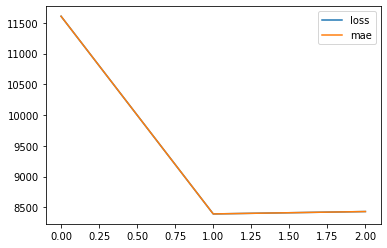

In [158]:
pd.DataFrame(history.history).plot()


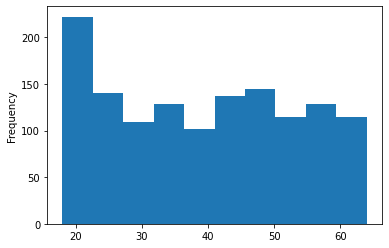

In [159]:
X['age'].plot(kind='hist')

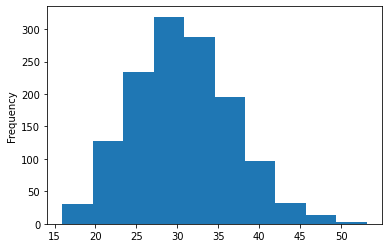

In [160]:
X['bmi'].plot(kind='hist')

In [161]:
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/ShakhriyorKh/Machine-Learning-with-R-datasets/master/insurance.csv')

In [162]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [163]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [164]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [165]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.1553 - mae: 13345.1553
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.5186 - mae: 13342.5186
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.4600 - mae: 13336.4600
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13324.1416 - mae: 13324.1416
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13302.5088 - mae: 13302.5088
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.4561 - mae: 13268.4561
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13219.1201 - mae: 13219.1201
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13151.7490 - mae: 13151.7490
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13063.6299 - mae: 13063.6299
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12952.17

In [166]:
insurance_model_3.evaluate(X_test_normal, y_test )

9/9 [==============================] - 0s 3ms/step - loss: 8622.1035 - mae: 8622.1035


[8622.103515625, 8622.103515625]